# Simple Linear Regression. Minimal example

### Import the relevant libraries

In [2]:
# We must always import the relevant libraries for our problem at hand. NumPy is a must for this example.
import numpy as np

# matplotlib and mpl_toolkits are not necessary. We employ them for the sole purpose of visualizing the results.  
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Generate random input data to train on

In [3]:
# First, we should declare a variable containing the size of the training set we want to generate.
observations = 1000

# We will work with two variables as inputs. You can think about them as x1 and x2 in our previous examples.
# We have picked x and z, since it is easier to differentiate them.
# We are about to create a 2-variable linear model
# f(x,z) = a*x + b*z + c
# We generate them randomly, drawing from a uniform distribution. 
# There are 3 arguments of this method (low, high, size).
# According to our theory the appropriate size is (# of observations)*(# of variables) = (# of observations)(1), 
# as we are only talking about one variable x. We would do a similiar operation for z.
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# Combine the two dimensions of the input into one input matrix. 
# This is the X matrix from the linear model y = x*w + b.
# column_stack is a Numpy method, which combines two vectors into a matrix. Alternatives are stack, dstack, hstack, etc.
inputs = np.column_stack((xs,zs))

# Check if the dimensions of the inputs are the same as the ones we defined in the linear model lectures. 
# They should be n x k, where n is the number of observations, and k is the number of variables, so 1000 x 2.
print (inputs.shape)

(1000, 2)


In supervised learning, we must know 2 major parameters: inputs and targets.

Others are weights, biases and outputs (left to the computer):
- The weights and the biases are varied through the algorithm
- The outputs are the result from the model employed.

So, now we create the targets as well :

### Generate the targets we will aim at

In [4]:
# We want to "make up" a function lets say f(x,z) = 2x - 3z + 5 , 
# and see if the algorithm has learned it.
# We add a small random noise to the function i.e. f(x,z) = 2x - 3z + 5 + <small noise>
noise = np.random.uniform(-1, 1, (observations,1))
# noise.size => 1000
# size will match the size of the xs and zs
# You may be wondering about the noise. It is introduced to randomize our data a bit. 
# Real data always contains noise. It's never perfect. Introducing some small noise will make the data a bit random, 
# yet the underlying linear relationship will be retained.

# Now, lets produce the targets according to the 'f(x,z) = 2x - 3z + 5 + noise' definition.
# In this way, we are basically saying: the weights should be w1=2 and w2=-3, while the bias is b=5.
targets = 2*xs - 3*zs + 5 + noise

# Check the shape of the targets just in case. It should be n x m, where m is the number of output variables, so 1000 x 1.
print (targets.shape)

(1000, 1)


We have our input data, which is in a 1000 * 2 matrix.
In non-linear algebraic terms, this refers to a two-variable problem with 1000 observations.

We also have our targets. I will quickly plot the data so we see there is a strong linear relationship.

### Plot the training data

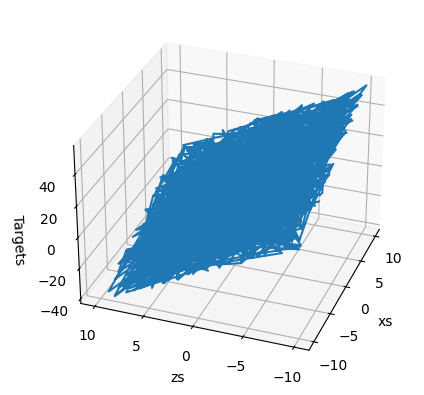

In [18]:
# In order to use the 3D plot, the objects should have a certain shape, so we reshape the targets.
# The proper method to use is reshape and takes as arguments the dimensions in which we want to fit the object.
targets = targets.reshape(observations,)
xs = xs.reshape(observations,)
zs = zs.reshape(observations,)

# Plotting according to the conventional matplotlib.pyplot syntax

# Declare the figure
fig = plt.figure()

# A method allowing us to create the 3D plot
ax = fig.add_subplot(111, projection='3d')

# Choose the axes.
ax.plot(xs, zs, targets)

# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

# You can fiddle with the azim parameter to plot the data from different angles. Just change the value of azim=100
# to azim = 0 ; azim = 200, or whatever. Check and see what happens.
ax.view_init(azim=200)

# So far we were just describing the plot. This method actually shows the plot. 
plt.show()

# We reshape the targets back to the shape that they were in before plotting.
# This reshaping is a side-effect of the 3D plot. Sorry for that.
targets = targets.reshape(observations,1)
xs = xs.reshape(observations,1)
zs = zs.reshape(observations,1)

All right, let's reexamine the linear model y = xw + b. Our algorithm will try to find such values for w and b so the outputs, y, are closest to the targets. Remember, when we performed the gradient descent,we started from an arbitrary number and then proceeded. Well, we must do the same thing now. However, this is tricky. Conventionally, we don't want to start from an arbitrary number we choose. Rather, we randomly select small initial weights. We will talk about that in more detail later. For now, let's declare a variable called init_range and set it to 0.1.

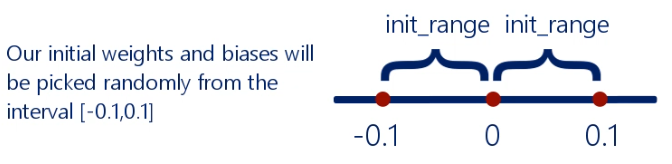

That will be the radius of the range we will use to initialize the weights and the biases. 
Our initial weights and biases will be picked randomly from the interval -0.1 to 0.1. We will generate them as we did so far, by using the  random dot uniform method. The size of the weights matrix is 2x1 as we have two variables, so there are two weights, one for each input variable and a single output. 
Let's declare the bias analogically. The appropriate shape is 1x1, so the bias is a scaler. 
In machine-learning, there are many biases as there are outputs. Each bias refers to an output. If you recall the example we saw earlier about apartment prices and apartment rent, it involved two biases, as there were two outputs.
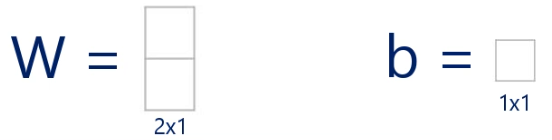

### Initialize variables

In [19]:
# We will initialize the weights and biases randomly in some small initial range.
# init_range is the variable that will measure that.
# You can play around with the initial range, but we don't really encourage you to do so.
# High initial ranges may prevent the machine learning algorithm from learning.
init_range = 0.1

# Weights are of size k x m, where k is the number of input variables and m is the number of output variables
# In our case, the weights matrix is 2x1 since there are 2 inputs (x and z) and one output (y)
weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))

# Biases are of size 1 since there is only 1 output. The bias is a scalar.
biases = np.random.uniform(low=-init_range, high=init_range, size=1)

#Print the weights to get a sense of how they were initialized.
print (weights)
print (biases)

[[0.05803533]
 [0.04711582]]
[-0.06148573]


### Set a learning rate

In [6]:
# Set some small learning rate (denoted eta in the lecture). 
# 0.02 is going to work quite well for our example. Once again, you can play around with it.
# It is HIGHLY recommended that you play around with it.
learning_rate = 0.02

You will have to play around with it so you can see how different learning rates affect the speed of optimization.
So, we are all set. We have inputs, targets, and arbitrary numbers for weights and biases. What is left is to vary the weights and biases so our outputs are closest to the targets.
As we know by now, the problem boils down to minimizing the loss function with respect to the weights and the biases. And because this is a regression, we'll use one half the L2 norm loss function.